In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP
import scipy.special as sp
import math
np.random.seed(42)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## loading data


In [2]:
def load_data(name):
    data=pd.read_csv(name,sep=' ',header=None)
    return data



## data preprocess

In [3]:
######### Scaling the data #########
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def Scale(type,Features):
    
    if type == 'standard':
            scalar= StandardScaler()
    elif type=='minmax':
            scalar= MinMaxScaler()

    boolean_columns = Features.select_dtypes(include=['bool']).columns
    columns_to_scale = Features.columns.difference(boolean_columns)
    Features[columns_to_scale]= scalar.fit_transform(Features[columns_to_scale])
    return Features


## PCA

In [4]:
######### PCA #########

def PCA(data,dimension):

    coVarMatrix = np.cov(data,rowvar=False)
    eigenValues, eigenVectors = np.linalg.eig(coVarMatrix)
    index = eigenValues.argsort()[::-1]
    eigenValues = eigenValues[index]
    eigenVectors = eigenVectors[:,index]
    reducedData = np.dot(data,eigenVectors[:,:dimension])
    return reducedData


## EM Algorithm

In [5]:
# Em algorithm for possion distribution ##
class EM:
    def __init__(self, data, k, max_iter=100, epsilon=1e-4):
        self.data = data
        self.n, self.d = data.shape
        self.k = k
        self.max_iter = max_iter
        self.epsilon = epsilon
        self.weights = np.ones(self.k) / self.k
        self.pji=np.zeros((self.n, self.k))
        self.mu = np.random.rand(self.k, self.d)
        self.log_likelihood = 0
        self.prev_log_likelihood = 0
        

    def fit(self):
        for _ in range(self.max_iter):
            pji = self.expectation()
            self.maximize(pji)
            
            if  abs(self.log_likelihood-self.prev_log_likelihood)< self.epsilon:
                break
            self.pji = pji
            self.prev_log_likelihood = self.log_likelihood
        return self.pji

    def expectation(self):
        pji = np.zeros((self.n, self.k))
        for i in range (self.k):
            pji[:,i] = self.weights[i] * np.prod(np.power(self.mu[i][0], self.data) / sp.factorial(self.data), axis=1)* math.exp(-self.mu[i][0])
        
        self.log_likelihood = np.sum(np.log(np.sum(pji, axis=1)))
        pji = pji / np.sum(pji, axis=1)[: , None]
        return pji
  

    def maximize(self, pji):
        N = np.sum(pji, axis=0)
        self.weights = N / self.n
        self.mu = np.dot(pji.T, self.data) / N[:, None]



#     def predict(self):
#         return np.argmax(self.gamma, axis=1)
    

# running pca with data

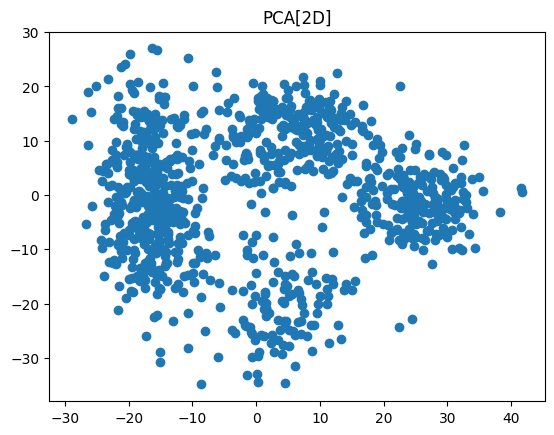

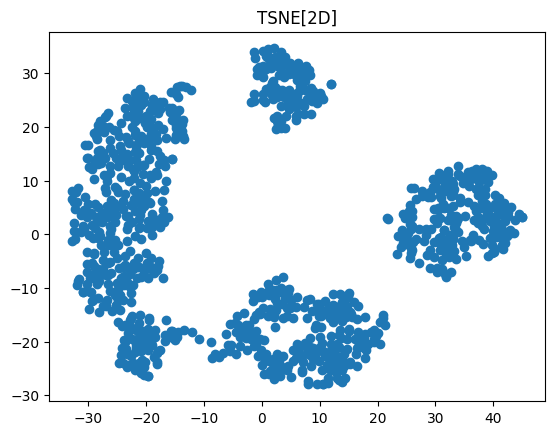

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


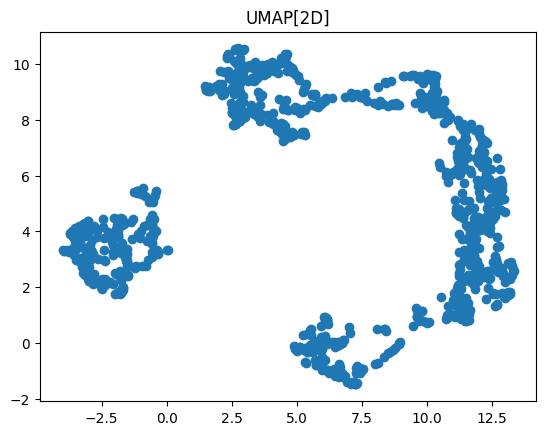

In [6]:
name1='pca_data.txt'
data=load_data(name1)
data=Scale('standard',data)

##### my implemented dimensionality reduction #####
reducedData=PCA(data,2)
plt.scatter(reducedData[:,0],reducedData[:,1])
plt.title('PCA[2D]')
plt.show()

##### using tsne from sklearn #####

tsne = TSNE(n_components=2,perplexity=30,random_state=0)
tsneData = tsne.fit_transform(data)
plt.scatter(tsneData[:,0],tsneData[:,1])
plt.title('TSNE[2D]')
plt.show()


###### using umap from umap-learn #####

umap = UMAP(n_components=2,n_neighbors=5,random_state=0)
umapData = umap.fit_transform(data)
plt.scatter(umapData[:,0],umapData[:,1])
plt.title('UMAP[2D]')
plt.show()




# running em with data

In [7]:


name2='em_data.txt'
data=load_data(name2)
# print(data)
em=EM(data,2)
pji=em.fit()


print("\n")
print(" mean number of children in families with family planning: ",em.mu[0][0])
print(" mean number of children in families without family planning: ",em.mu[1][0])
print("\n")
print("proportion of families with  family planning: ",em.weights[0])
print("proportion of families without family planning: ",em.weights[1])
# pji= np.array ([[0.6,0.4],[0.5,0.5],[0.7,0.3],[0.8,0.2]])
# data=np.array([[1,2,3,4]]).T
# result=np.dot(pji.T,data)
# print(result)
# n_k=pji.sum(axis=0)
# weights=n_k/4
# print(n_k)
# mu=np.dot(pji.T,data)/n_k[:,None]
# print(mu)
# print(weights)
# print(data)
# for k in range(2):
#     pji[:,k]=weights[k]*np.prod(np.power(mu[k][0],data) /sp.factorial(data),axis=1)* math.exp(-mu[k][0])

# print(pji)
# print(np.sum(pji,axis=1))
# pji = pji / np.sum(pji, axis=1)[:,None]
# print(pji)




 mean number of children in families with family planning:  1.7758134680139759
 mean number of children in families without family planning:  4.905136377055165


proportion of families with  family planning:  0.3541137841203771
proportion of families without family planning:  0.6458862158796232
